# Predicting the Diameter of Asteroids using a Neural Network

## Introduction

The dataset we'll be looking at contains 27 features on asteroids. The task is to predict the asteroid's diameter based on the other features provided. The features in the dataset include:

- full_name: asteroid's name
- a: semi-major axis
- e: eccentricity
- G: magnitide slope parameter
- i: inclination
- om: longitude of ascending node
- w: argument of perihelion
- q: perihelion distance
- ad: aphelion distance
- per_y: orbital period
- data_arc: data arc-span
- condition_code: orbit condition code
- n_obs_used: number of observations used
- H: absolute magnitude parameter
- diameter: diameter
- extent: axial ellipsoid dimensions
- albedo: geometric albedo
- rot_per: rotation period
- GM: gravitational parameter
- BV: B-V magnitude difference
- UB: U-B magnitude difference
- IR: I-R magnitude difference
- spec_B: SMASSII
- spec_T: Tholen
- neo: near earth object
- pha: physically hazardous asteroid
- moid: earth minimum orbit intersection distance

## Preparing the Data

In [50]:
import pandas as pd

asteroid = pd.read_csv('/Users/cain/Documents/Deep Learning/Data Sets/asteroid-diameter/Asteroid.csv')

/Users/cain/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11,14,15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


While loading the data we get a data type warning. It appears multiple columns have mixed data types. We'll need to sort this out before we can build our model.

In [2]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
full_name         839736 non-null object
a                 839734 non-null float64
e                 839736 non-null float64
G                 119 non-null float64
i                 839736 non-null float64
om                839736 non-null float64
w                 839736 non-null float64
q                 839736 non-null float64
ad                839730 non-null float64
per_y             839735 non-null float64
data_arc          823947 non-null float64
condition_code    838743 non-null object
n_obs_used        839736 non-null int64
H                 837042 non-null float64
diameter          137681 non-null object
extent            18 non-null object
albedo            136452 non-null float64
rot_per           18796 non-null float64
GM                14 non-null float64
BV                1021 non-null float64
UB                979 non-null float64
IR                1 non-null f

There are quite a few columns with mixed data types (these are likely full of NA's). Since we will ultimately be predicting the diameter, we need to drop the observations that contain missing values and store the remaining values as numerics.

In [51]:
asteroid['diameter'] = pd.to_numeric(asteroid['diameter'], errors = 'coerce') 
drop = asteroid['diameter'][asteroid['diameter'].isnull()].index
asteroid = asteroid.drop(drop, axis = 0) 

In [52]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137680 entries, 0 to 810411
Data columns (total 27 columns):
full_name         137680 non-null object
a                 137680 non-null float64
e                 137680 non-null float64
G                 118 non-null float64
i                 137680 non-null float64
om                137680 non-null float64
w                 137680 non-null float64
q                 137680 non-null float64
ad                137680 non-null float64
per_y             137680 non-null float64
data_arc          137540 non-null float64
condition_code    137680 non-null object
n_obs_used        137680 non-null int64
H                 136929 non-null float64
diameter          137680 non-null float64
extent            15 non-null object
albedo            136448 non-null float64
rot_per           11187 non-null float64
GM                13 non-null float64
BV                1004 non-null float64
UB                964 non-null float64
IR                1 non-null 

You can see that this has reduced our observations from 839,736 asteroids down to 137,680.

Let's go ahead and drop all of the features that are lacking sufficient data. If the feature is missing at least half of the data, we will drop it.

In [53]:
smallFeatures = asteroid.columns[asteroid.isna().sum()/asteroid.shape[0] > 0.5]
asteroid = asteroid.drop(smallFeatures, axis = 1)

In [54]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137680 entries, 0 to 810411
Data columns (total 18 columns):
full_name         137680 non-null object
a                 137680 non-null float64
e                 137680 non-null float64
i                 137680 non-null float64
om                137680 non-null float64
w                 137680 non-null float64
q                 137680 non-null float64
ad                137680 non-null float64
per_y             137680 non-null float64
data_arc          137540 non-null float64
condition_code    137680 non-null object
n_obs_used        137680 non-null int64
H                 136929 non-null float64
diameter          137680 non-null float64
albedo            136448 non-null float64
neo               137680 non-null object
pha               137680 non-null object
moid              137680 non-null float64
dtypes: float64(13), int64(1), object(4)
memory usage: 20.0+ MB


Let's now look at the features that are of the object type. We can drop the asteroid name and the condition code, as these do not have anything to do with the diameter.

In [55]:
asteroid = asteroid.drop(['condition_code', 'full_name'], axis = 1)

The only other two features of object type are neo and pha. Let's figure out what is stored in these features.

In [56]:
asteroid.neo.unique()

array(['N', 'Y'], dtype=object)

In [57]:
asteroid.pha.unique()

array(['N', 'Y'], dtype=object)

The asteroids are indicated to be near earth objects and physically hazardous asteroids with a "N" for no and "Y" for yes. We can create a dummy variable for each of these features.

In [58]:
asteroid = pd.get_dummies(asteroid, columns = ['neo', 'pha'])

There are still some remaining features with missing values. Let's apply the column mean to the remaining NA's.

In [59]:
asteroid = asteroid.fillna(asteroid.mean())

In [60]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137680 entries, 0 to 810411
Data columns (total 18 columns):
a             137680 non-null float64
e             137680 non-null float64
i             137680 non-null float64
om            137680 non-null float64
w             137680 non-null float64
q             137680 non-null float64
ad            137680 non-null float64
per_y         137680 non-null float64
data_arc      137680 non-null float64
n_obs_used    137680 non-null int64
H             137680 non-null float64
diameter      137680 non-null float64
albedo        137680 non-null float64
moid          137680 non-null float64
neo_N         137680 non-null uint8
neo_Y         137680 non-null uint8
pha_N         137680 non-null uint8
pha_Y         137680 non-null uint8
dtypes: float64(13), int64(1), uint8(4)
memory usage: 16.3 MB


Now we'll begin subsetting the data into train and test sets.

### Splitting Data into Train and Test Sets

We'll use sklearn to split the data into train and test sets. The training set will be used to actually develop the model. We'll save the test set later to check the performance of the model.

In [13]:
from sklearn.model_selection import train_test_split
predictors = asteroid.drop('diameter', axis = 1) 
target = asteroid['diameter']
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, 
                                                    test_size = 0.20, 
                                                    random_state = 1)

### Pre-processing

Next we are going to normalize the data using sklearn. This will give all of the features a mean of zero and a standard deviation of one.

In [14]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr = std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns = X.columns, index = X.index)

X_train = scaler(X_train)
X_test = scaler(X_test)

### Getting a Validation Set

We'll be using hold-out validation to evaluate the model during the training process. The following code subsets 25,000 observations for validation (roughly the same amount as the test set).

In [15]:
X_val = X_train[:25000]
partial_X_train = X_train[25000:]

Y_val = Y_train[:25000]
partial_Y_train = Y_train[25000:]

### Defining and Fitting the Model

Let's create the model now. We'll start with four hidden dense layers, all activated with the rectified linear unit function. The last layer will be a dense layer with one node. Our loss funtion will be the mean square error (mse). We'll use ADAM as our optimizer function. We'll also be measuring the mean absolute error (mae). We'll start off with a relatively small batch size of 64. Let's perform 50 epochs to get a good idea on how the model is doing.

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation = 'relu', 
                input_dim = partial_X_train.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam', 
              metrics = ['mae'])

history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 50, 
                    batch_size = 64, 
                    validation_data = (X_val, Y_val))

Using TensorFlow backend.



Train on 85144 samples, validate on 25000 samples
Epoch 1/50
85144/85144 [==============================] - 6s 68us/step - loss: 29.6241 - mae: 1.2200 - val_loss: 25.0635 - val_mae: 0.8084
Epoch 2/50
85144/85144 [==============================] - 4s 51us/step - loss: 17.5706 - mae: 0.8093 - val_loss: 25.9462 - val_mae: 0.7368
Epoch 3/50
85144/85144 [==============================] - 5s 56us/step - loss: 12.2491 - mae: 0.8064 - val_loss: 21.7983 - val_mae: 0.6694
Epoch 4/50
85144/85144 [==============================] - 5s 58us/step - loss: 6.2273 - mae: 0.7246 - val_loss: 20.6225 - val_mae: 0.5951
Epoch 5/50
85144/85144 [==============================] - 5s 61us/step - loss: 5.8261 - mae: 0.6939 - val_loss: 36.2391 - val_mae: 0.8541
Epoch 6/50
85144/85144 [==============================] - 5s 62us/step - loss: 7.7952 - mae: 0.8246 - val_loss: 21.5609 - val_mae: 1.3925
Epoch 7/50
85144/85144 [==============================] - 5s 58us/step - loss: 7.6957 - mae: 0.7004 - val_loss: 15.468

### Plotting the Performance

Okay, the model is done training. Let's plot the train and validation loss (mse) over all the epochs.

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('asteroids_loss1.jpg')
plt.show()

<Figure size 640x480 with 1 Axes>

The loss fluctuates quite a bit. Let's adjust the model slightly by increasing the batch size to reduce variability in batches, then plot the loss again.

In [18]:
history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 50, 
                    batch_size = 512, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/50
85144/85144 [==============================] - 1s 11us/step - loss: 1.3372 - mae: 0.4668 - val_loss: 7.2457 - val_mae: 0.5041
Epoch 2/50
85144/85144 [==============================] - 1s 11us/step - loss: 1.0410 - mae: 0.4559 - val_loss: 8.6466 - val_mae: 0.4823
Epoch 3/50
85144/85144 [==============================] - 1s 11us/step - loss: 0.9729 - mae: 0.4457 - val_loss: 7.7628 - val_mae: 0.4826
Epoch 4/50
85144/85144 [==============================] - 1s 11us/step - loss: 0.9560 - mae: 0.4426 - val_loss: 8.3335 - val_mae: 0.4766
Epoch 5/50
85144/85144 [==============================] - 1s 11us/step - loss: 0.9477 - mae: 0.4405 - val_loss: 8.5770 - val_mae: 0.4870
Epoch 6/50
85144/85144 [==============================] - 1s 11us/step - loss: 0.9483 - mae: 0.4407 - val_loss: 7.4295 - val_mae: 0.4727
Epoch 7/50
85144/85144 [==============================] - 1s 11us/step - loss: 0.9386 - mae: 0.4382 - val_loss: 6.8482 - val_mae

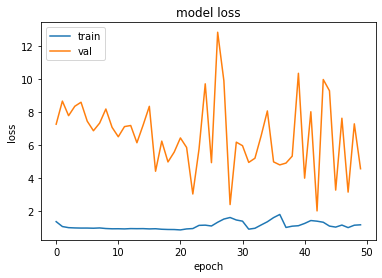

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('asteroids_loss2.jpg')
plt.show()

That helped reduce a lot of the noise we were seeing. It's clear that we are overfitting on the train set. Let's start tuning by reducing the size of our hidden layers.

In [20]:
model = Sequential()
model.add(Dense(64, activation = 'relu', 
                input_dim = partial_X_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam', 
              metrics = ['mae'])

history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 50, 
                    batch_size = 512, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/50
85144/85144 [==============================] - 2s 20us/step - loss: 48.0303 - mae: 2.2786 - val_loss: 37.6303 - val_mae: 1.5959
Epoch 2/50
85144/85144 [==============================] - 1s 8us/step - loss: 25.7773 - mae: 1.2034 - val_loss: 26.4082 - val_mae: 0.9767
Epoch 3/50
85144/85144 [==============================] - 1s 8us/step - loss: 17.9535 - mae: 0.8888 - val_loss: 27.1304 - val_mae: 1.1468
Epoch 4/50
85144/85144 [==============================] - 1s 8us/step - loss: 13.6835 - mae: 0.7731 - val_loss: 22.8317 - val_mae: 0.7055
Epoch 5/50
85144/85144 [==============================] - 1s 8us/step - loss: 11.5659 - mae: 0.7700 - val_loss: 19.0552 - val_mae: 0.7201
Epoch 6/50
85144/85144 [==============================] - 1s 8us/step - loss: 9.3504 - mae: 0.6998 - val_loss: 17.1383 - val_mae: 0.6598
Epoch 7/50
85144/85144 [==============================] - 1s 8us/step - loss: 7.5690 - mae: 0.6916 - val_loss: 24.2072 - v

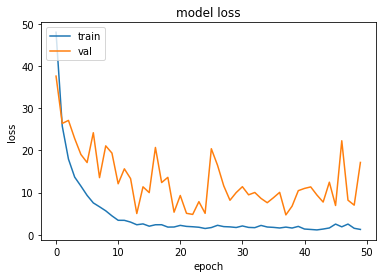

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('asteroids_loss3.jpg')
plt.show()

Still overfitting quite a bit. Let's try reducing the number of hidden layers we have and decreasing the size of the last hidden layer. 

In [22]:
model = Sequential()
model.add(Dense(64, activation = 'relu', 
                input_dim = partial_X_train.shape[1]))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam', 
              metrics = ['mae'])

history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 50, 
                    batch_size = 512, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/50
85144/85144 [==============================] - 1s 16us/step - loss: 66.9657 - mae: 2.5634 - val_loss: 51.2142 - val_mae: 1.6737
Epoch 2/50
85144/85144 [==============================] - 1s 6us/step - loss: 37.5637 - mae: 1.5526 - val_loss: 40.9911 - val_mae: 1.5457
Epoch 3/50
85144/85144 [==============================] - 1s 6us/step - loss: 29.5288 - mae: 1.3277 - val_loss: 38.4486 - val_mae: 1.2782
Epoch 4/50
85144/85144 [==============================] - 1s 7us/step - loss: 24.0924 - mae: 1.0834 - val_loss: 31.9740 - val_mae: 0.9094
Epoch 5/50
85144/85144 [==============================] - 1s 7us/step - loss: 20.4328 - mae: 0.8738 - val_loss: 30.5449 - val_mae: 0.9824
Epoch 6/50
85144/85144 [==============================] - 1s 7us/step - loss: 18.2685 - mae: 0.8320 - val_loss: 26.1966 - val_mae: 0.7547
Epoch 7/50
85144/85144 [==============================] - 1s 7us/step - loss: 16.3703 - mae: 0.7614 - val_loss: 28.8458 -

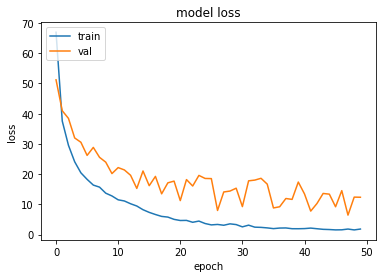

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('asteroids_loss4.jpg')
plt.show()

We're still overfitting, but if we keep reducing the model size then we will lose strength. Let's add some dropout layers between the hidden layers to help mitigate the overfitting.

In [24]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation = 'relu', 
                input_dim = partial_X_train.shape[1]))
model.add(Dropout(.25))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(.25))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(.25))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam', 
              metrics = ['mae'])

history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 50, 
                    batch_size = 512, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/50
85144/85144 [==============================] - 2s 28us/step - loss: 80.6800 - mae: 3.5511 - val_loss: 52.4946 - val_mae: 1.5863
Epoch 2/50
85144/85144 [==============================] - 1s 14us/step - loss: 49.8735 - mae: 2.3122 - val_loss: 52.1283 - val_mae: 1.8227
Epoch 3/50
85144/85144 [==============================] - 1s 14us/step - loss: 43.8396 - mae: 2.0863 - val_loss: 45.9188 - val_mae: 1.4153
Epoch 4/50
85144/85144 [==============================] - 1s 14us/step - loss: 38.3441 - mae: 1.9508 - val_loss: 39.9946 - val_mae: 1.3489
Epoch 5/50
85144/85144 [==============================] - 1s 14us/step - loss: 34.0484 - mae: 1.8523 - val_loss: 34.2121 - val_mae: 1.2492
Epoch 6/50
85144/85144 [==============================] - 1s 14us/step - loss: 32.5295 - mae: 1.7746 - val_loss: 33.6704 - val_mae: 1.1299
Epoch 7/50
85144/85144 [==============================] - 1s 14us/step - loss: 28.6481 - mae: 1.6848 - val_loss: 33.

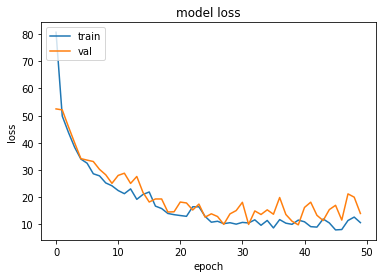

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('asteroids_loss5.jpg')
plt.show()

It looks like we have reduced the overfitting. The loss starts to taper around the 30th epoch. Let's adjust the model accordingly, and then evaluate the model using the test set.

In [26]:
history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 30, 
                    batch_size = 512, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/30
85144/85144 [==============================] - 1s 14us/step - loss: 10.5904 - mae: 1.0065 - val_loss: 9.7737 - val_mae: 0.8218
Epoch 2/30
85144/85144 [==============================] - 1s 14us/step - loss: 10.2115 - mae: 0.9908 - val_loss: 9.5778 - val_mae: 0.8140
Epoch 3/30
85144/85144 [==============================] - 1s 14us/step - loss: 8.9025 - mae: 0.9972 - val_loss: 11.6992 - val_mae: 0.8368
Epoch 4/30
85144/85144 [==============================] - 1s 14us/step - loss: 9.7769 - mae: 0.9871 - val_loss: 16.2616 - val_mae: 0.8489
Epoch 5/30
85144/85144 [==============================] - 1s 14us/step - loss: 8.5323 - mae: 0.9860 - val_loss: 14.4576 - val_mae: 0.8850
Epoch 6/30
85144/85144 [==============================] - 1s 14us/step - loss: 9.7885 - mae: 0.9797 - val_loss: 11.2678 - val_mae: 0.9113
Epoch 7/30
85144/85144 [==============================] - 1s 14us/step - loss: 9.4182 - mae: 0.9783 - val_loss: 14.6437 - 

In [27]:
test_loss, test_mae = model.evaluate(X_test, Y_test)

print('The test loss is', round(test_loss, 3), 
      'and the test mae is', round(test_mae, 3))

27536/27536 [==============================] - 1s 23us/step
The test loss is 6.388 and the test mae is 0.969


The mean absolute error indicates how much we are off on average. It can be difficult to analyze the performace off of these values alone, especially if we don't know much about asteroid diameters. Let's calculate R^2 to better understand the model.

In [28]:
from sklearn.metrics import r2_score

def score(predictions):
    score = r2_score(predictions, Y_test)
    return score
def announce(score):
    print('The R^2 for our model is', round(score, 3))

Y_pred = model.predict(X_test)
r2 = score(Y_pred)
announce(r2)

The R^2 for our model is 0.895


## Feature Engineering

The previous model just utilizes the features given in the dataset; however, it can be beneficial to engineer some additional features. Let's add some potentially useful features now and see if we can improve our model. The log of each feature will be added to the data and we'll run our model. Note that we won't be taking the log of the neo and pha features, as these are just indicators. Once we add the log transforms, we'll pre-process and normalize the data just as before.

In [61]:
import numpy as np

indicators = asteroid.filter(['neo_N', 'neo_Y', 'pha_N', 'pha_Y'], axis = 1)
asteroid = asteroid.drop(['neo_N', 'neo_Y', 'pha_N', 'pha_Y'], axis = 1)

asteroid['diameter'] = asteroid['diameter'].apply(np.log)
for column in asteroid.columns.drop(['diameter']):
    asteroid['log('+column+')'] = asteroid[column].apply(np.log)
asteroid = asteroid.dropna(axis = 1)

asteroid = pd.concat([asteroid, indicators], axis = 1)

predictors = asteroid.drop('diameter', axis = 1) 
target = asteroid['diameter']
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, 
                                                    test_size = 0.20, 
                                                    random_state = 1)

std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr = std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns = X.columns, index = X.index)

X_train = scaler(X_train)
X_test = scaler(X_test)

X_val = X_train[:25000]
partial_X_train = X_train[25000:]

Y_val = Y_train[:25000]
partial_Y_train = Y_train[25000:]

In [30]:
model = Sequential()
model.add(Dense(64, activation = 'relu', 
                input_dim = partial_X_train.shape[1]))
model.add(Dropout(.25))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(.25))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(.25))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam', 
              metrics = ['mae'])

history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 30, 
                    batch_size = 512, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/30
85144/85144 [==============================] - 2s 27us/step - loss: 1.0136 - mae: 0.7092 - val_loss: 0.0854 - val_mae: 0.2334
Epoch 2/30
85144/85144 [==============================] - 1s 14us/step - loss: 0.2575 - mae: 0.3766 - val_loss: 0.0617 - val_mae: 0.1945
Epoch 3/30
85144/85144 [==============================] - 1s 14us/step - loss: 0.2087 - mae: 0.3320 - val_loss: 0.0633 - val_mae: 0.1981
Epoch 4/30
85144/85144 [==============================] - 1s 15us/step - loss: 0.1661 - mae: 0.2981 - val_loss: 0.0513 - val_mae: 0.1691
Epoch 5/30
85144/85144 [==============================] - 1s 14us/step - loss: 0.1490 - mae: 0.2762 - val_loss: 0.0497 - val_mae: 0.1636
Epoch 6/30
85144/85144 [==============================] - 1s 14us/step - loss: 0.1303 - mae: 0.2606 - val_loss: 0.0364 - val_mae: 0.1373
Epoch 7/30
85144/85144 [==============================] - 1s 13us/step - loss: 0.1197 - mae: 0.2476 - val_loss: 0.0355 - val_mae

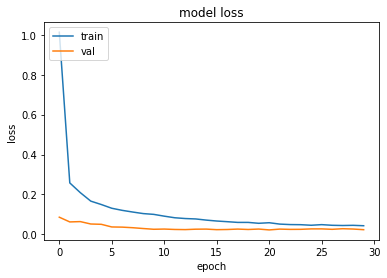

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('asteroids_loss6.jpg')
plt.show()

The orginal model we used is converging much faster now. We are overfitting with the additional features. Let's simplify the model by reducing the amout of layers and making them smaller. There's also less noise in the loss now, so we'll lower the batch size as well.

In [62]:
model = Sequential()
model.add(Dense(16, activation = 'relu', 
                input_dim = partial_X_train.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam', 
              metrics = ['mae'])

history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 30, 
                    batch_size = 64, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/30
85144/85144 [==============================] - 3s 31us/step - loss: 0.2077 - mae: 0.2587 - val_loss: 0.0290 - val_mae: 0.1194
Epoch 2/30
85144/85144 [==============================] - 2s 22us/step - loss: 0.0238 - mae: 0.1068 - val_loss: 0.0191 - val_mae: 0.0975
Epoch 3/30
85144/85144 [==============================] - 2s 23us/step - loss: 0.0176 - mae: 0.0916 - val_loss: 0.0161 - val_mae: 0.0866
Epoch 4/30
85144/85144 [==============================] - 2s 23us/step - loss: 0.0155 - mae: 0.0857 - val_loss: 0.0147 - val_mae: 0.0837
Epoch 5/30
85144/85144 [==============================] - 2s 23us/step - loss: 0.0142 - mae: 0.0824 - val_loss: 0.0156 - val_mae: 0.0840
Epoch 6/30
85144/85144 [==============================] - 2s 23us/step - loss: 0.0146 - mae: 0.0812 - val_loss: 0.0252 - val_mae: 0.0812
Epoch 7/30
85144/85144 [==============================] - 2s 22us/step - loss: 0.0202 - mae: 0.0799 - val_loss: 0.0134 - val_mae

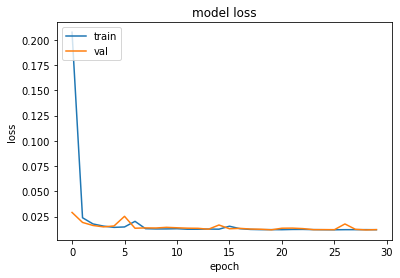

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('asteroids_loss7.jpg')
plt.show()

It doesn't take very long to fit the data. Let's retrain the model with only 3 epochs and evaluate the model.

In [64]:
history = model.fit(partial_X_train, partial_Y_train, 
                    epochs = 4, 
                    batch_size = 64, 
                    validation_data = (X_val, Y_val))

Train on 85144 samples, validate on 25000 samples
Epoch 1/4
85144/85144 [==============================] - 2s 23us/step - loss: 0.0120 - mae: 0.0749 - val_loss: 0.0121 - val_mae: 0.0750
Epoch 2/4
85144/85144 [==============================] - 2s 23us/step - loss: 0.0117 - mae: 0.0746 - val_loss: 0.0116 - val_mae: 0.0735
Epoch 3/4
85144/85144 [==============================] - 2s 23us/step - loss: 0.0118 - mae: 0.0747 - val_loss: 0.0118 - val_mae: 0.0742
Epoch 4/4
85144/85144 [==============================] - 2s 22us/step - loss: 0.0118 - mae: 0.0745 - val_loss: 0.0127 - val_mae: 0.0741


In [65]:
test_loss, test_mae = model.evaluate(X_test, Y_test)

print('The test loss is', round(test_loss, 3), 
      'and the test mae is', round(test_mae, 3))

27536/27536 [==============================] - 0s 15us/step
The test loss is 0.013 and the test mae is 0.078


In [66]:
Y_pred = model.predict(X_test)
r2 = score(Y_pred)
announce(r2)

The R^2 for our model is 0.967


After the feature engineering, we don't need as complex of a model. Even with just two relatively small hidden layers, we are able to get a high R^2 value.